<a href="https://colab.research.google.com/github/CurtCalledBurt/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#decided to try my hand at recursion because I'm a dummy... but I think it works

def prob_drunk_given_positive(prob_drunk_prior, 
                              prob_positive, 
                              prob_positive_given_drunk, 
                              iterations):
  if iterations == 1: #allows have a way out of the loop
    return prob_positive_given_drunk * prob_drunk_prior / prob_positive
  else:
    iterations = iterations - 1  #this lowers iterations until it hits 1
    prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior, prob_positive, 
                                                 prob_positive_given_drunk, 
                                                 iterations)
    return prob_positive_given_drunk * prob_drunk_prior / prob_positive

In [3]:
prob = prob_drunk_given_positive(1/1000, .08, 1, 1)
print(prob)

0.0125


In [4]:
for i in range(10):
  prob = prob_drunk_given_positive(1/1000, .08, 1, i+1)
  print("Probablity of DUI after ", i+1, "Tests is: ", prob)

Probablity of DUI after  1 Tests is:  0.0125
Probablity of DUI after  2 Tests is:  0.15625
Probablity of DUI after  3 Tests is:  1.953125
Probablity of DUI after  4 Tests is:  24.4140625
Probablity of DUI after  5 Tests is:  305.17578125
Probablity of DUI after  6 Tests is:  3814.697265625
Probablity of DUI after  7 Tests is:  47683.7158203125
Probablity of DUI after  8 Tests is:  596046.4477539062
Probablity of DUI after  9 Tests is:  7450580.596923828
Probablity of DUI after  10 Tests is:  93132257.46154785


OOOOOOKKKKKKAAAAAAAY the greater than 1.00 numbers are HIGHLY suspicious, and most likely indicitive that this recursion is broken. But it does work for the first iteration.

In [6]:
prob_drunk = prob_drunk_given_positive(1/1000, .08, 1, 1)
prob_drunk

0.0125

In [7]:
prob_drunk = prob_drunk_given_positive(prob_drunk, .08, 1, 1)
prob_drunk

0.15625

Hmm. Okay, so my recursion is working as intended. It's just breaking statistics now. Great.

In [0]:
def non_recursive_func(prob_drunk_prior, 
                              prob_positive, 
                              prob_positive_given_drunk):
  return prob_positive_given_drunk * prob_drunk_prior / prob_positive

In [10]:
prob_drunk = non_recursive_func(1/1000, .08, 1)
prob_drunk

0.0125

In [11]:
prob_drunk = non_recursive_func(prob_drunk, .08, 1)
prob_drunk

0.15625

Okay so the recursion wasn't the problem. Must be a fault in how 
I'm applying the formula I'm using. Or maybe the formula used in 
lecture for this part is incomplete, I remember
ryan saying something about the version used wasn't quite right.

In [13]:
#I'm just going to use the formula from the drug example
#on the drunk example, do it by "hand", and see if we get .0125
1 * 1/1000 / (1 * 1/1000 + .08 * 999/1000) 

0.012357884330202669

AH HA! the formula the drunk section of lecture was using
WAS missing stuff!

In [0]:
# p_positive_g_drunk * p_drunk /
# (p_positive_g_drunk * p_drunk + p_positive_g_sober * p_sober)

In [0]:
def non_recursive(p_drunk, 
                       p_positive_g_sober, 
                       p_positive_g_drunk):
  p_sober = 1 - p_drunk
  return p_positive_g_drunk * p_drunk / (p_positive_g_drunk * p_drunk + p_positive_g_sober * p_sober)

In [25]:
non_recursive(1/1000, .08, 1)

0.012357884330202669

Looks good.

In [0]:
def p_drunk_g_positive(p_drunk, 
                       p_positive_g_sober, 
                       p_positive_g_drunk, 
                       iterations):
  
  if iterations == 1:
    p_sober = 1 - p_drunk
    return p_positive_g_drunk * p_drunk / (p_positive_g_drunk * p_drunk + p_positive_g_sober * p_sober)
  
  else:
    p_sober = 1 - p_drunk
    p_drunk = p_drunk_g_positive(p_drunk, 
                                 p_positive_g_sober, 
                                 p_positive_g_drunk, 
                                 iterations - 1)
    p_sober = 1 - p_drunk
    return (p_positive_g_drunk * p_drunk) / (p_positive_g_drunk * p_drunk + p_positive_g_sober * p_sober)

In [34]:
p_drunk_g_positive(1/1000, .08, 1, 1)

0.012357884330202669

In [36]:
for i in range(10):
  prob = p_drunk_g_positive(1/1000, .08, 1, i+1)
  print("Certainty of DUI after ", i+1, "Tests is: ", prob*100,'%')

Certainty of DUI after  1 Tests is:  1.2357884330202669 %
Certainty of DUI after  2 Tests is:  13.525210993291495 %
Certainty of DUI after  3 Tests is:  66.15996951348605 %
Certainty of DUI after  4 Tests is:  96.06895076105054 %
Certainty of DUI after  5 Tests is:  99.67371577896735 %
Certainty of DUI after  6 Tests is:  99.97381867081508 %
Certainty of DUI after  7 Tests is:  99.99790498904363 %
Certainty of DUI after  8 Tests is:  99.99983239589308 %
Certainty of DUI after  9 Tests is:  99.99998659165077 %
Certainty of DUI after  10 Tests is:  99.99999892733193 %


And there we go. Problems all seem sorted. \\
Given how many false positives this test puts out, it makes sense that it takes 4-5 times before we become very, very sure that someone is drunk

In [41]:
data = []
index = []
for i in range(10):
  prob = p_drunk_g_positive(1/1000, .08, 1, i+1)
  data.append(prob)
  index.append(i + 1)
print(data, '\n', index)

[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054, 0.9967371577896734, 0.9997381867081508, 0.9999790498904363, 0.9999983239589307, 0.9999998659165077, 0.9999999892733192] 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [42]:
df = pd.DataFrame({'consecutive_pos_tests': index, 'dui_probability': data})
df

,consecutive_pos_tests,dui_probability
0,1,0.012358
1,2,0.135252
2,3,0.661600
3,4,0.960690
4,5,0.996737
5,6,0.999738
6,7,0.999979
7,8,0.999998
8,9,1.000000
9,10,1.000000


In [46]:
df.dtypes

consecutive_pos_tests      int64
dui_probability          float64
dtype: object

Text(0, 0.5, 'Percent Chance the Person is Drunk ')

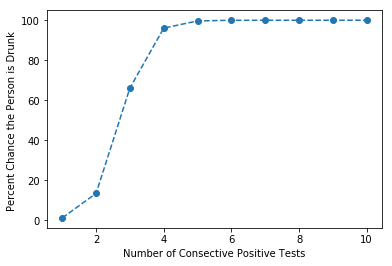

In [67]:
plt.plot(df['consecutive_pos_tests'], 
         df['dui_probability']*100, 
         linestyle='--', 
         marker='o')
plt.xlabel('Number of Consective Positive Tests')
plt.ylabel('Percent Chance the Person is Drunk ')

In [70]:
#here we play a little with the politics data set with bayesian statistcs
politics = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
bills = {
    'republican': 'party',
    'n': 'infants',
    'y': 'cost-sharing',
    'n.1': 'budget',
    'y.1': 'fee-freeze',
    'y.2': 'el-salvador',
    'y.3': 'religion',
    'n.2': 'test-ban',
    'n.3': 'nicaraguan-contras', 
    'n.4': 'mx-missile', 
    'y.4': 'immigration', 
    '?': 'corporation-cutback', 
    'y.5': 'education', 
    'y.6': 'right-to-sue', 
    'y.7': 'crime', 
    'n.5': 'duty-free-exports', 
    'y.8': 'export-administration'
}
politics = politics.rename(columns = bills)
politics = politics.replace({'y': 1, 'n': -1, '?': 0})
politics.head()

,party,infants,cost-sharing,budget,fee-freeze,el-salvador,religion,test-ban,nicaraguan-contras,mx-missile,immigration,corporation-cutback,education,right-to-sue,crime,duty-free-exports,export-administration
0,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
1,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
2,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
3,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
4,democrat,-1,1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1


In [0]:
import scipy.stats as stats

In [98]:
conf_int, _, _ = stats.bayes_mvs(politics['cost-sharing'],.95)
conf_int

Mean(statistic=0.004608294930875576, minmax=(-0.0844682510421027, 0.09368484090385384))

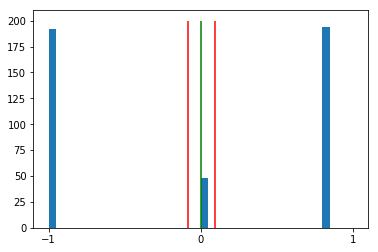

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(politics['cost-sharing'], width = .05)
ax.vlines(conf_int.statistic, ymin = 0, ymax = 200, colors='g')
ax.vlines(conf_int[1][0], ymin = 0, ymax = 200, colors='r')
ax.vlines(conf_int[1][1], ymin = 0, ymax = 200, colors='r')
plt.xticks([-1,0,1])

plt.show();

In [0]:
#frequentist statistician function
def freq_dui (p_drunk_g_positive, iterations):
  
  return 1 - (1 - p_drunk_g_positive)**iterations

In [78]:
freq_dui(.92, 3)

0.999488

In [80]:
data2 = []
index2 = []
for i in range(10):
  prob = freq_dui(.92, i+1)
  data2.append(prob)
  index2.append(i + 1)
print(data2, '\n', index2)

[0.92, 0.9936, 0.999488, 0.99995904, 0.9999967232, 0.999999737856, 0.99999997902848, 0.9999999983222784, 0.9999999998657823, 0.9999999999892626] 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [82]:
df2 = pd.DataFrame({'consecutive_pos_tests': index2, 'dui_probability': data2})
df2

,consecutive_pos_tests,dui_probability
0,1,0.920000
1,2,0.993600
2,3,0.999488
3,4,0.999959
4,5,0.999997
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000


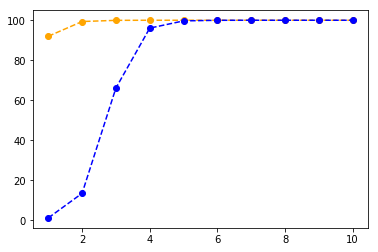

In [95]:
#graphing both the bayesian and the frequentist together
plt.plot(df2['consecutive_pos_tests'], 
         df2['dui_probability']*100, 
         linestyle='--', 
         marker='o',
         color = 'orange')

plt.plot(df['consecutive_pos_tests'], 
         df['dui_probability']*100, 
         linestyle='--', 
         marker='o',
         color = 'blue')

plt.show();

The Frequentists only look at what data they currently have; they only look at what event just happened in a vacuum. Hence, if the drug test with a 92% sensitivity comes up positive they have no problem saying the person is 92% likely to be on the drug \\
The Bayesians allow themselves to look at how likely their results are compared to other possible results. So, if the drug test comes up positive they look at how likely that is amongst all the possibilities where the test came up positive. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)